# Basics of the study

This study is based on [this article](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/) from Jason Brownlee. The explanation is great and quite intuitive!

## Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import mean_squared_error, r2_score

## Importing series

### IPCA (general)  
General IPCA stands for general extended national consumer prices index. Having an overview of it would be useful for better understanding what's in store for the models and then making some adjustments so it becomes easier to work with.

In [2]:
ipca_general = pd.read_csv('Data/IPCA-general.csv', sep=';', decimal=',')
ipca_general.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_general = ipca_general.drop('Dropme', axis=1)
ipca_general = ipca_general.set_index('Date')
print(ipca_general.info(),'\n')
print(ipca_general.head())

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 1980.01 to 2023.12
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variation_Percentage  528 non-null    float64
dtypes: float64(1)
memory usage: 8.2+ KB
None 

         Variation_Percentage
Date                         
1980.01              6.615649
1980.02              4.616919
1980.03              6.038389
1980.04              5.286114
1980.05              5.702721


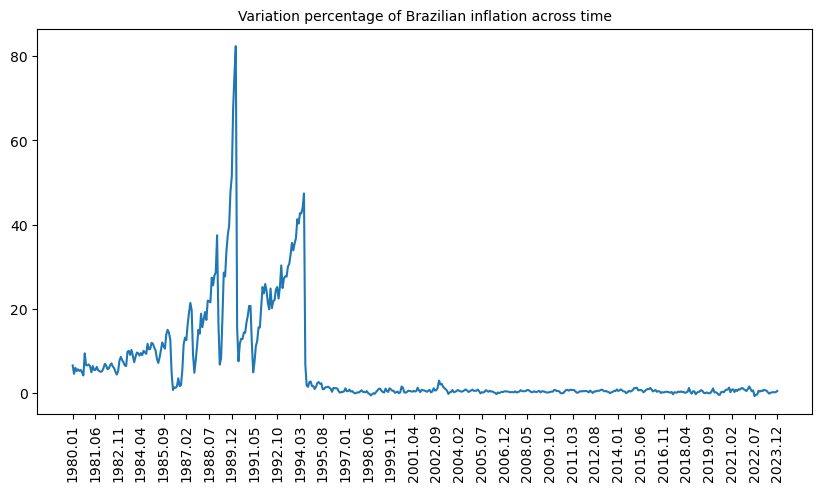

In [3]:
plt.figure(figsize=(10,5))
plt.title('Variation percentage of Brazilian inflation across time', fontsize=10)
plt.plot(ipca_general)
plt.xticks(range(0,len(ipca_general),int(len(ipca_general)/33)+1), rotation=90)
plt.show()

Percentage values scaling from 0 to 100 and beyond might not be particularly helpful for working with a machine learning model, so the series will be divided by 100.

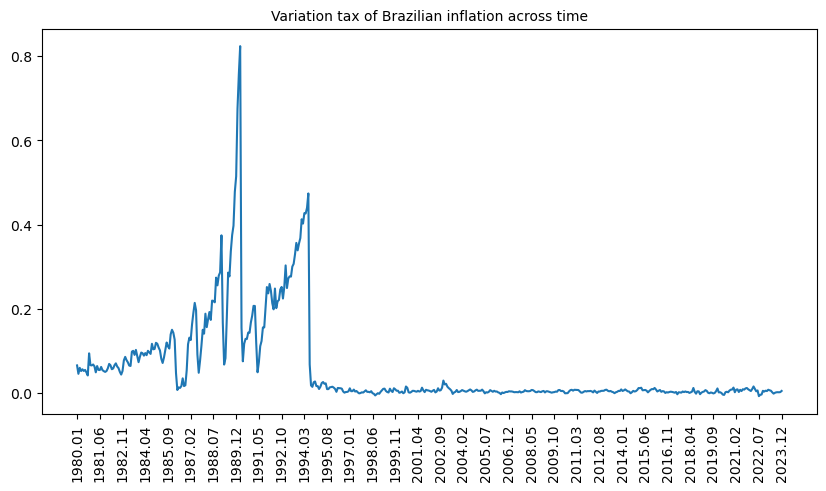

In [4]:
ipca_general_raw = ipca_general.div(100)
plt.figure(figsize=(10,5))
plt.title('Variation tax of Brazilian inflation across time', fontsize=10)
plt.plot(ipca_general_raw)
plt.xticks(range(0,len(ipca_general_raw),int(len(ipca_general_raw)/33)+1), rotation=90)
plt.show()

Now the series can be properly worked with.

### IPCA (food and beverages)  
The inflation of food and beverages might behave differently from general inflation overall, so it might be interesting to analyze it as well.

In [5]:
ipca_food = pd.read_csv('Data/IPCA-food.csv', sep=';', decimal=',')
ipca_food.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_food = ipca_food.drop('Dropme', axis=1)
ipca_food = ipca_food.set_index('Date')
print(ipca_food.info(),'\n')
print(ipca_food.head())

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 1980.10 to 2023.12
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variation_Percentage  518 non-null    float64
dtypes: float64(1)
memory usage: 8.1+ KB
None 

         Variation_Percentage
Date                         
1980.10                  5.92
1980.11                 10.97
1980.12                  5.73
1981.01                  6.41
1981.02                  5.34


There's one missing value in the series, so it will be treated as the mean between the neighbor values.

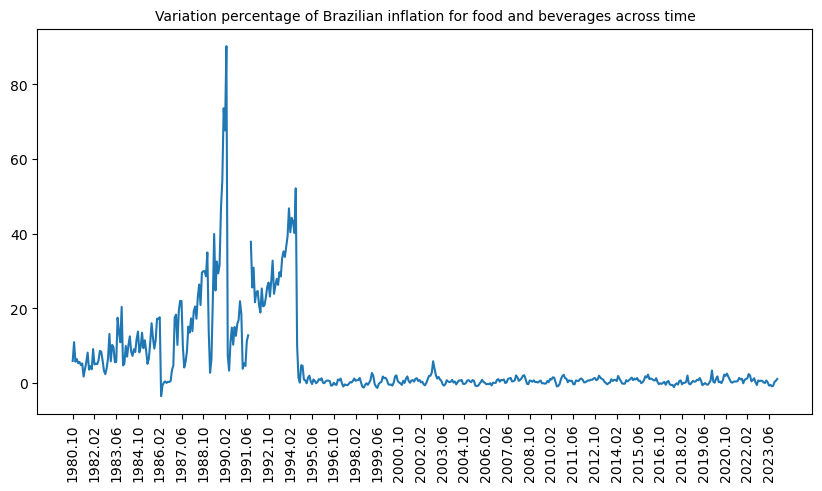

In [6]:
plt.figure(figsize=(10,5))
plt.title('Variation percentage of Brazilian inflation for food and beverages across time', fontsize=10)
plt.plot(ipca_food)
plt.xticks(range(0,len(ipca_food),int(len(ipca_food)/33)+1), rotation=90)
plt.show()

The missing value is between 1991.06 and 1992.10, so it's important to look for it in this slice.

In [7]:
ipca_food['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,11.23
1991.07,12.79
1991.08,NaN
1991.09,37.85
1991.10,25.61
1991.11,30.91
1991.12,21.66
1992.01,24.30
1992.02,24.68


In [8]:
ipca_food_notnull = ipca_food.copy()
ipca_food_notnull = ipca_food_notnull.fillna((12.79+37.85)/2)
ipca_food_notnull['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,11.23
1991.07,12.79
1991.08,25.32
1991.09,37.85
1991.10,25.61
1991.11,30.91
1991.12,21.66
1992.01,24.30
1992.02,24.68


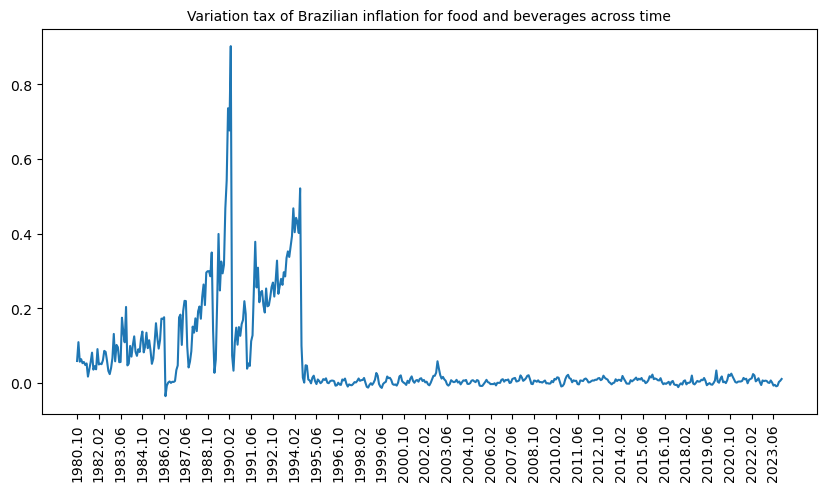

In [9]:
ipca_food_raw = ipca_food_notnull.div(100)
plt.figure(figsize=(10,5))
plt.title('Variation tax of Brazilian inflation for food and beverages across time', fontsize=10)
plt.plot(ipca_food_raw)
plt.xticks(range(0,len(ipca_food_raw),int(len(ipca_food_raw)/33)+1), rotation=90)
plt.show()

### IPCA (health expenses)

In [10]:
ipca_health = pd.read_csv('Data/IPCA-health.csv', sep=';', decimal=',')
ipca_health.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_health = ipca_health.drop('Dropme', axis=1)
ipca_health = ipca_health.set_index('Date')
print(ipca_health.info(),'\n')
print(ipca_health.head())

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 1980.10 to 2023.12
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Variation_Percentage  518 non-null    float64
dtypes: float64(1)
memory usage: 8.1+ KB
None 

         Variation_Percentage
Date                         
1980.10                  5.90
1980.11                  4.43
1980.12                  3.93
1981.01                  4.38
1981.02                  4.62


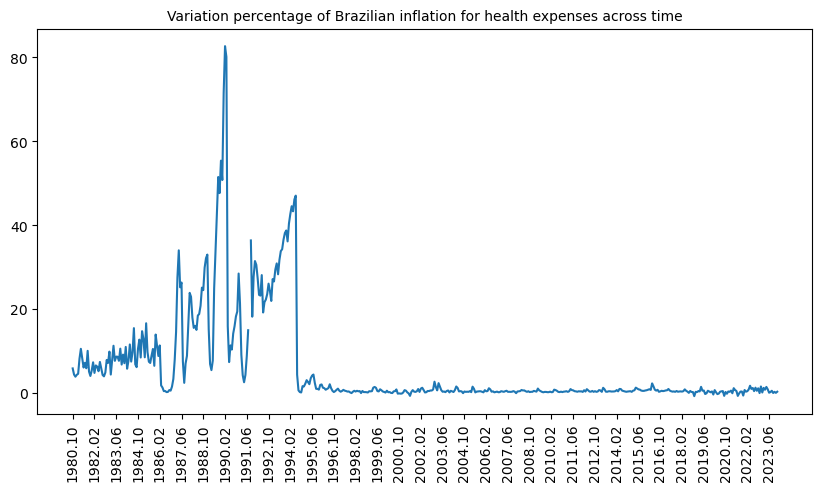

In [11]:
plt.figure(figsize=(10,5))
plt.title('Variation percentage of Brazilian inflation for health expenses across time', fontsize=10)
plt.plot(ipca_health)
plt.xticks(range(0,len(ipca_health),int(len(ipca_health)/33)+1), rotation=90)
plt.show()

In [12]:
ipca_health['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,8.87
1991.07,15.00
1991.08,NaN
1991.09,36.40
1991.10,18.23
1991.11,27.68
1991.12,31.49
1992.01,30.57
1992.02,27.33


In [13]:
ipca_health_notnull = ipca_health.copy()
ipca_health_notnull = ipca_health_notnull.fillna((15.00+36.40)/2)
ipca_health_notnull['1991.06':'1992.10']

,Variation_Percentage
Date,
1991.06,8.87
1991.07,15.00
1991.08,25.70
1991.09,36.40
1991.10,18.23
1991.11,27.68
1991.12,31.49
1992.01,30.57
1992.02,27.33


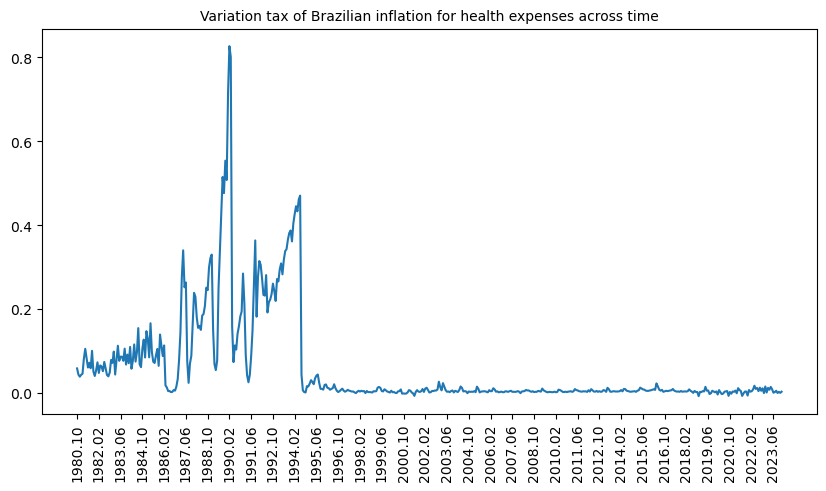

In [14]:
ipca_health_raw = ipca_health_notnull.div(100)
plt.figure(figsize=(10,5))
plt.title('Variation tax of Brazilian inflation for health expenses across time', fontsize=10)
plt.plot(ipca_health_raw)
plt.xticks(range(0,len(ipca_health_raw),int(len(ipca_health_raw)/33)+1), rotation=90)
plt.show()

# LSTM applications

In [15]:
# The series must first be prepared to fit the type of LSTM.
def split_Xy(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

## Standard LSTM  
Since the data is in months, the model itself will use 12 timesteps, assembling a batch of one year to predict the following month, and because the model is univariate, the number of features is 1. Those parameters used for Standard LSTM can also be used for a Stacked LSTM without any changes or additions.

### IPCA (general)

In [16]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

X_IPCAgen_std, y_IPCAgen_std = split_Xy(np.array(ipca_general_raw), n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAgen_std = X_IPCAgen_std.reshape((X_IPCAgen_std.shape[0], X_IPCAgen_std.shape[1], n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAgen_std = X_IPCAgen_std[:int(len(X_IPCAgen_std)*0.7)]
ytrain_IPCAgen_std = y_IPCAgen_std[:int(len(y_IPCAgen_std)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAgen_std = X_IPCAgen_std[int(len(X_IPCAgen_std)*0.7):int(len(X_IPCAgen_std)*0.9)]
yval_IPCAgen_std = y_IPCAgen_std[int(len(y_IPCAgen_std)*0.7):int(len(y_IPCAgen_std)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAgen_std = X_IPCAgen_std[int(len(X_IPCAgen_std)*0.9):]
ytest_IPCAgen_std = y_IPCAgen_std[int(len(y_IPCAgen_std)*0.9):]

In [17]:
lstm_IPCAgen_std = keras.models.Sequential()
lstm_IPCAgen_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_IPCAgen_std.add(keras.layers.Dense(1))
lstm_IPCAgen_std.compile(optimizer='adam', loss='mse')
lstm_IPCAgen_std.fit(Xtrain_IPCAgen_std, ytrain_IPCAgen_std, 
                     validation_data=(Xval_IPCAgen_std, yval_IPCAgen_std),
                     epochs=200, verbose=1)



Epoch 1/200

12/12 [==============================] - 1s 24ms/step - loss: 0.0211 - val_loss: 9.9460e-04
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.0042
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0121 - val_loss: 0.0056
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0038
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0014
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 6.7933e-04
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 8.3252e-05
Epoch 8/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 2.3349e-05
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 2.1454e-05
Epoch 10/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0050 - va

12/12 [==============================] - 0s 2ms/step


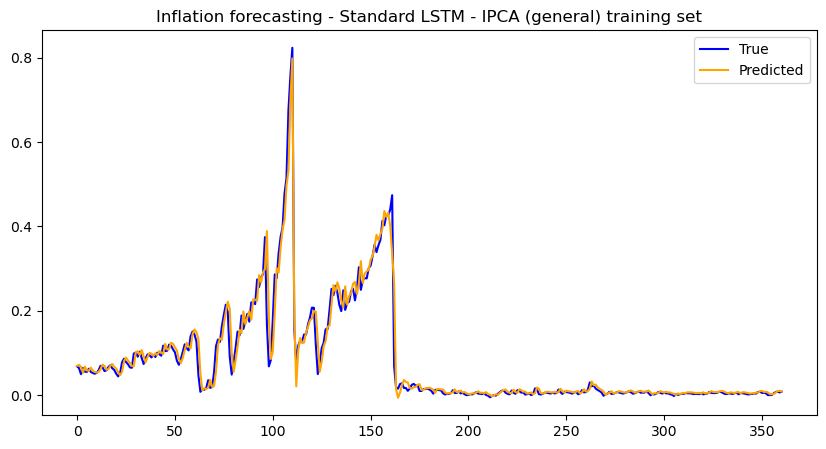

In [18]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Standard LSTM - IPCA (general) training set')
plt.plot(ytrain_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(Xtrain_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


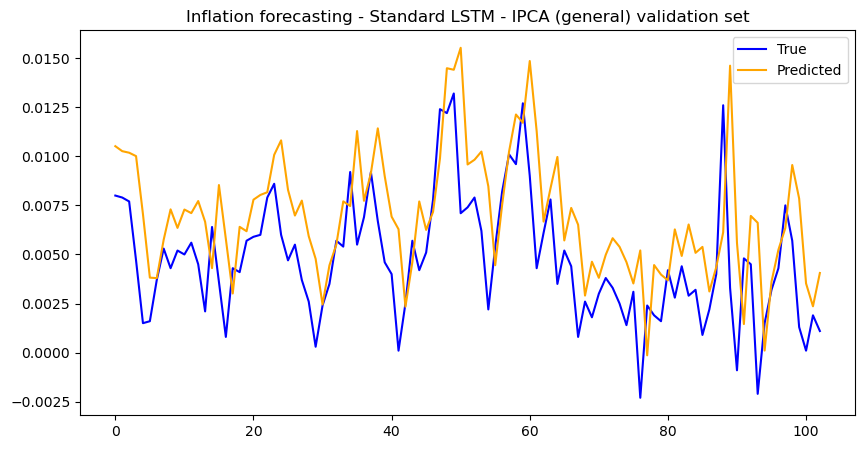

In [19]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Standard LSTM - IPCA (general) validation set')
plt.plot(yval_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(Xval_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


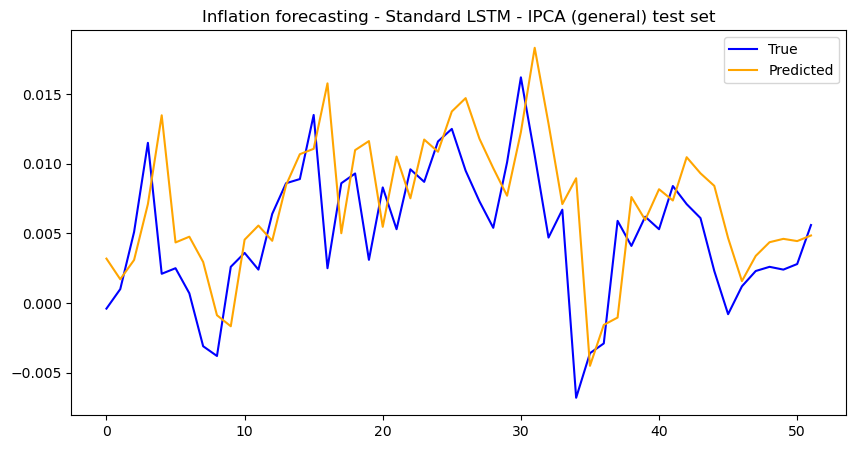

In [20]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Standard LSTM - IPCA (general) test set')
plt.plot(ytest_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(Xtest_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

17/17 [==============================] - 0s 2ms/step


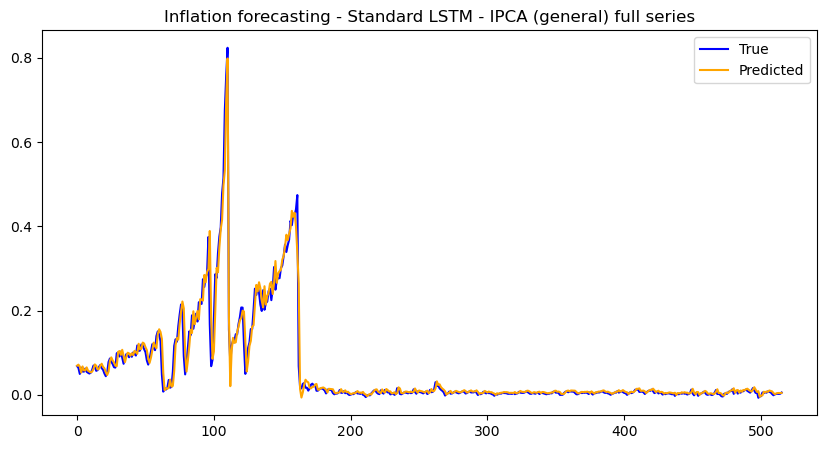

In [21]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Standard LSTM - IPCA (general) full series')
plt.plot(y_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_std.predict(X_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (food)

In [22]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

X_IPCAfood_std, y_IPCAfood_std = split_Xy(np.array(ipca_food_raw), n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAfood_std = X_IPCAfood_std.reshape((X_IPCAfood_std.shape[0], X_IPCAfood_std.shape[1], n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAfood_std = X_IPCAfood_std[:int(len(X_IPCAfood_std)*0.7)]
ytrain_IPCAfood_std = y_IPCAfood_std[:int(len(y_IPCAfood_std)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAfood_std = X_IPCAfood_std[int(len(X_IPCAfood_std)*0.7):int(len(X_IPCAfood_std)*0.9)]
yval_IPCAfood_std = y_IPCAfood_std[int(len(y_IPCAfood_std)*0.7):int(len(y_IPCAfood_std)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAfood_std = X_IPCAfood_std[int(len(X_IPCAfood_std)*0.9):]
ytest_IPCAfood_std = y_IPCAfood_std[int(len(y_IPCAfood_std)*0.9):]

In [23]:
lstm_IPCAfood_std = keras.models.Sequential()
lstm_IPCAfood_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_IPCAfood_std.add(keras.layers.Dense(1))
lstm_IPCAfood_std.compile(optimizer='adam', loss='mse')
lstm_IPCAfood_std.fit(Xtrain_IPCAfood_std, ytrain_IPCAfood_std, 
                      validation_data=(Xval_IPCAfood_std, yval_IPCAfood_std),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 24ms/step - loss: 0.0161 - val_loss: 0.0023
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 8.1082e-04
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 4.6350e-04
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 6.1498e-05
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 3.2969e-04
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 4.9692e-05
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 6.9373e-05
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 4.6084e-05
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0060

12/12 [==============================] - 0s 2ms/step


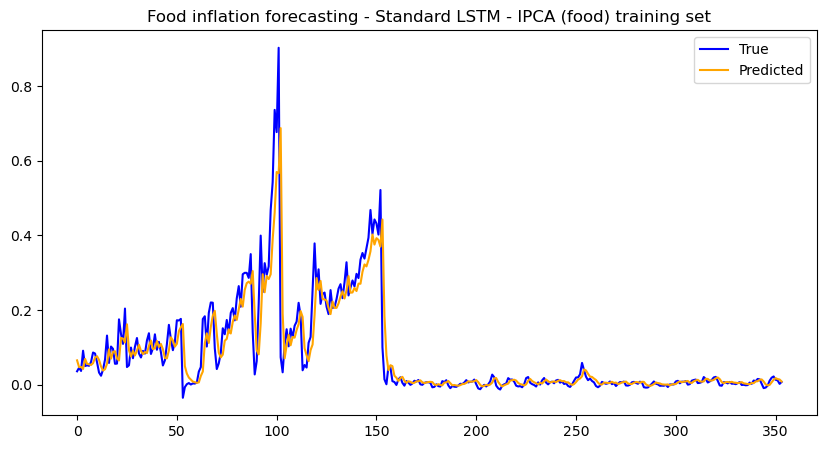

In [24]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Standard LSTM - IPCA (food) training set')
plt.plot(ytrain_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(Xtrain_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


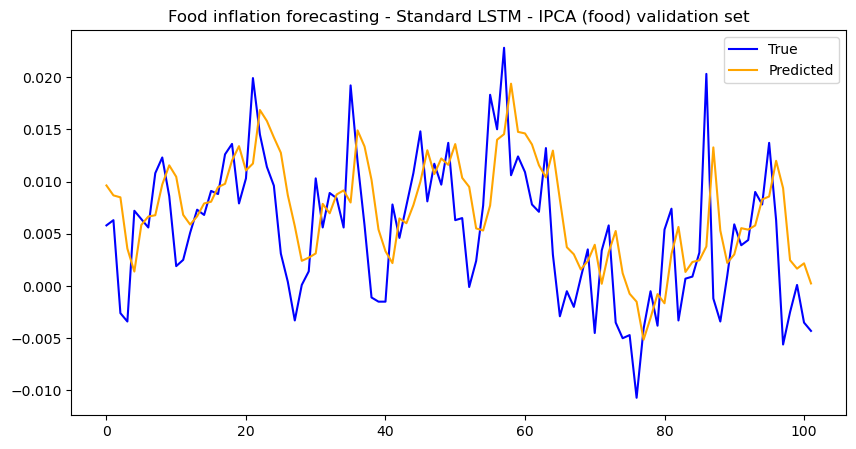

In [25]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Standard LSTM - IPCA (food) validation set')
plt.plot(yval_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(Xval_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


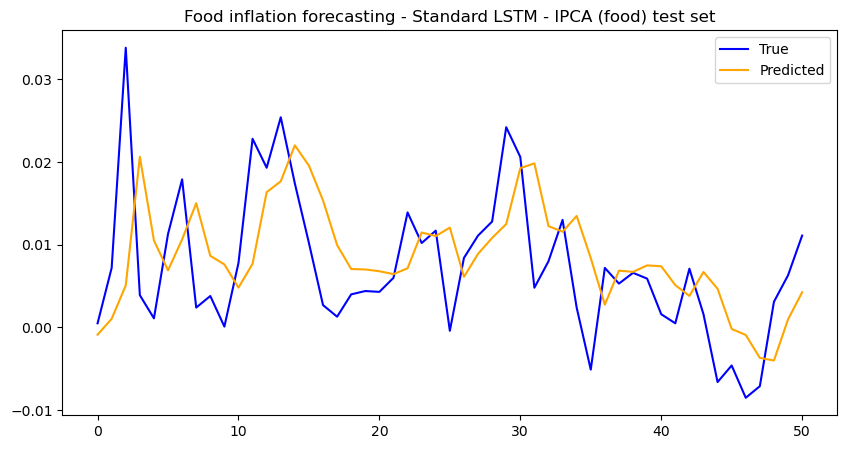

In [26]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Standard LSTM - IPCA (food) test set')
plt.plot(ytest_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(Xtest_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


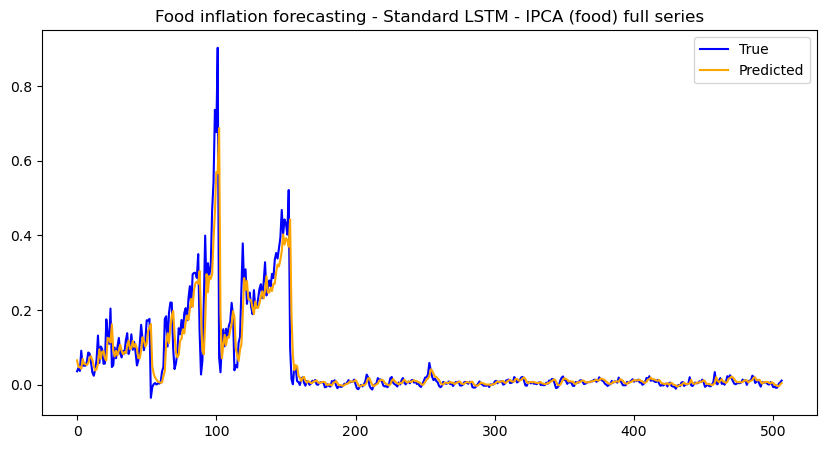

In [27]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Standard LSTM - IPCA (food) full series')
plt.plot(y_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_std.predict(X_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (health)

In [28]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

X_IPCAhlth_std, y_IPCAhlth_std = split_Xy(np.array(ipca_health_raw), n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAhlth_std = X_IPCAhlth_std.reshape((X_IPCAhlth_std.shape[0], X_IPCAhlth_std.shape[1], n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAhlth_std = X_IPCAhlth_std[:int(len(X_IPCAhlth_std)*0.7)]
ytrain_IPCAhlth_std = y_IPCAhlth_std[:int(len(y_IPCAhlth_std)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAhlth_std = X_IPCAhlth_std[int(len(X_IPCAhlth_std)*0.7):int(len(X_IPCAhlth_std)*0.9)]
yval_IPCAhlth_std = y_IPCAhlth_std[int(len(y_IPCAhlth_std)*0.7):int(len(y_IPCAhlth_std)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAhlth_std = X_IPCAhlth_std[int(len(X_IPCAhlth_std)*0.9):]
ytest_IPCAhlth_std = y_IPCAhlth_std[int(len(y_IPCAhlth_std)*0.9):]

In [29]:
lstm_IPCAhlth_std = keras.models.Sequential()
lstm_IPCAhlth_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_IPCAhlth_std.add(keras.layers.Dense(1))
lstm_IPCAhlth_std.compile(optimizer='adam', loss='mse')
lstm_IPCAhlth_std.fit(Xtrain_IPCAhlth_std, ytrain_IPCAhlth_std, 
                      validation_data=(Xval_IPCAhlth_std, yval_IPCAhlth_std),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 21ms/step - loss: 0.0181 - val_loss: 0.0031
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0040
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.0010
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0012
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 2.6516e-04
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 2.7458e-04
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 5.0427e-05
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 1.2163e-04
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 2.1020e-04
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0069 - val_l

12/12 [==============================] - 0s 2ms/step


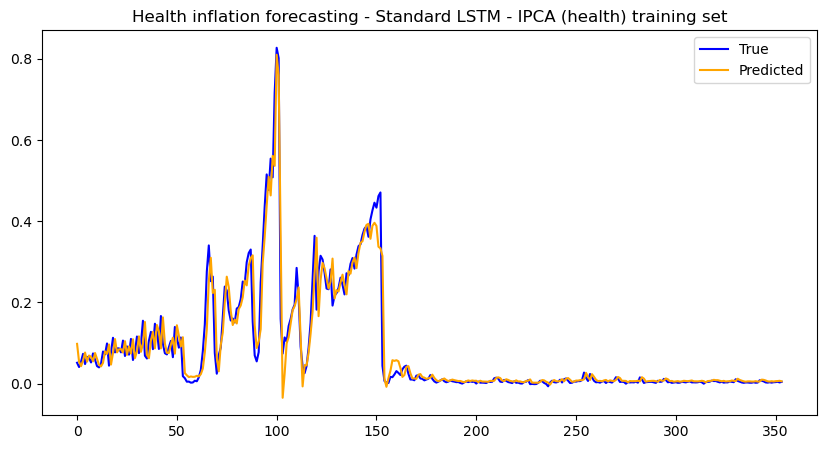

In [30]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Standard LSTM - IPCA (health) training set')
plt.plot(ytrain_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(Xtrain_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


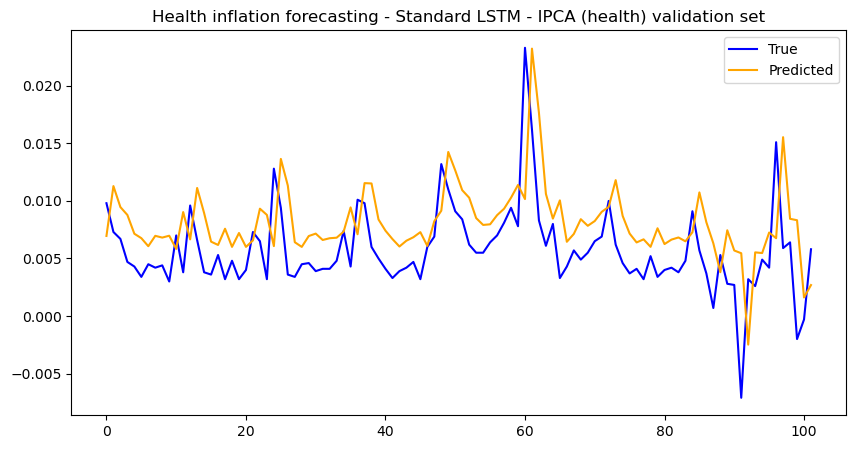

In [31]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Standard LSTM - IPCA (health) validation set')
plt.plot(yval_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(Xval_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


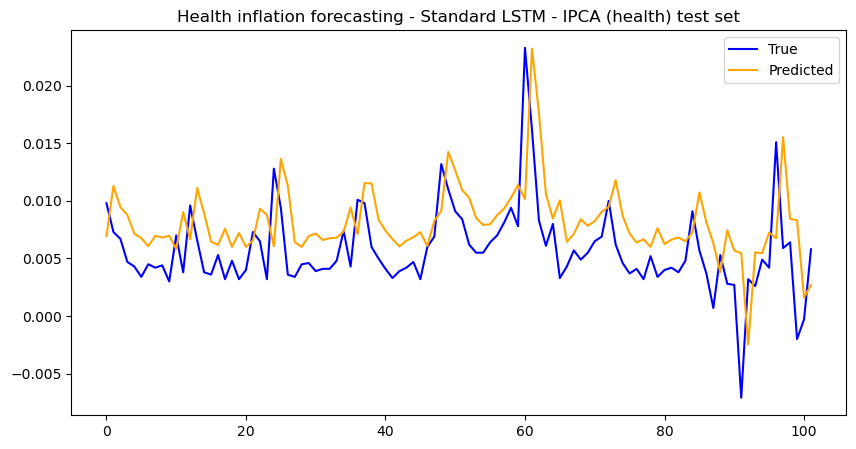

In [32]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Standard LSTM - IPCA (health) test set')
plt.plot(yval_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(Xval_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 1ms/step


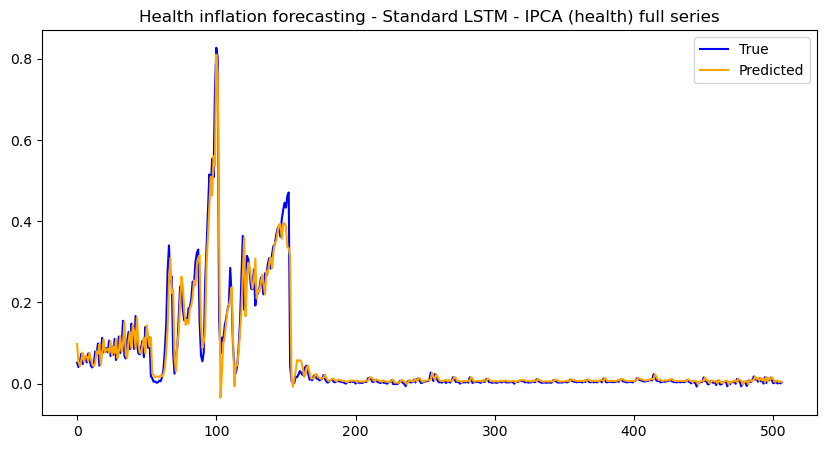

In [33]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Standard LSTM - IPCA (health) full series')
plt.plot(y_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_std.predict(X_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

## Stacked LSTM  
Since the Stacked LSTM uses data of the same shape as the Standard LSTM, it's only necessary to adjust the model itself, but the sequences may be kept unchanged.

### IPCA (general)

In [34]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_IPCAgen_stk = keras.models.Sequential()
lstm_IPCAgen_stk.add(keras.layers.LSTM(50, activation='relu', return_sequences=True,
                                       input_shape=(n_steps_std, n_features_std)))
lstm_IPCAgen_stk.add(keras.layers.LSTM(50, activation='relu'))
lstm_IPCAgen_stk.add(keras.layers.Dense(1))
lstm_IPCAgen_stk.compile(optimizer='adam', loss='mse')
lstm_IPCAgen_stk.fit(Xtrain_IPCAgen_std, ytrain_IPCAgen_std, 
                     validation_data=(Xval_IPCAgen_std, yval_IPCAgen_std),
                     epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 2s 31ms/step - loss: 0.0185 - val_loss: 0.0024
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.0059
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0010
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0080 - val_loss: 2.1536e-04
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 1.1128e-04
Epoch 6/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 5.3863e-05
Epoch 7/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0063 - val_loss: 1.2727e-04
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 2.9959e-04
Epoch 9/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 5.3658e-04
Epoch 10/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0057 - 

12/12 [==============================] - 0s 3ms/step


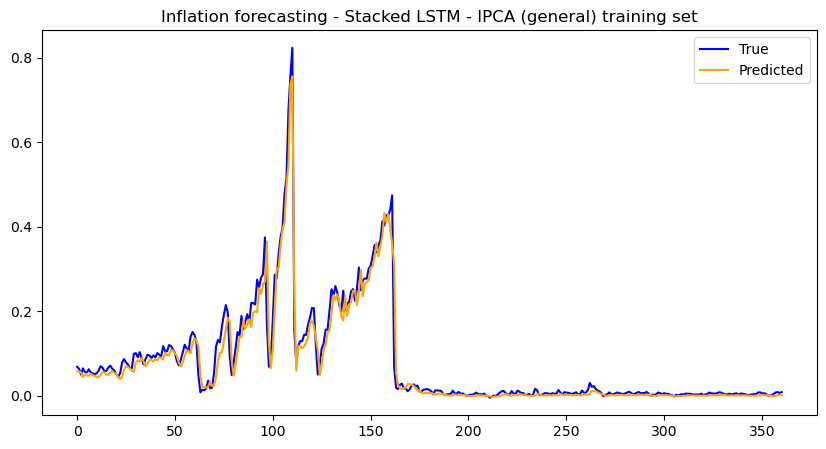

In [35]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Stacked LSTM - IPCA (general) training set')
plt.plot(ytrain_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_stk.predict(Xtrain_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


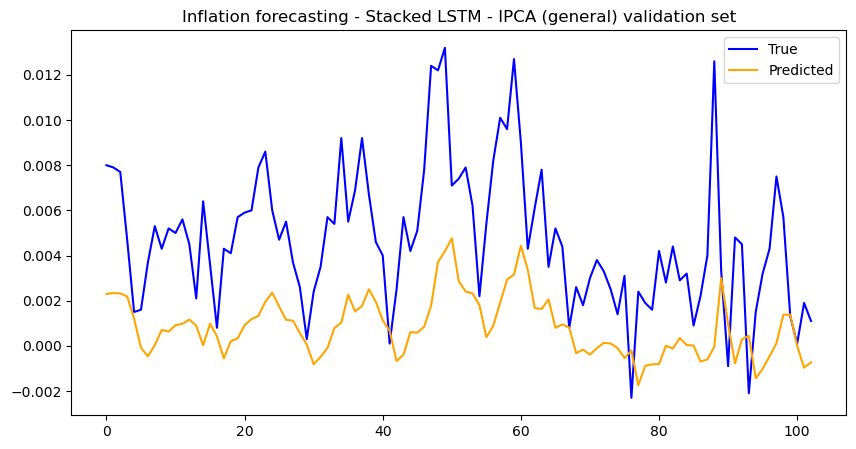

In [36]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Stacked LSTM - IPCA (general) validation set')
plt.plot(yval_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_stk.predict(Xval_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


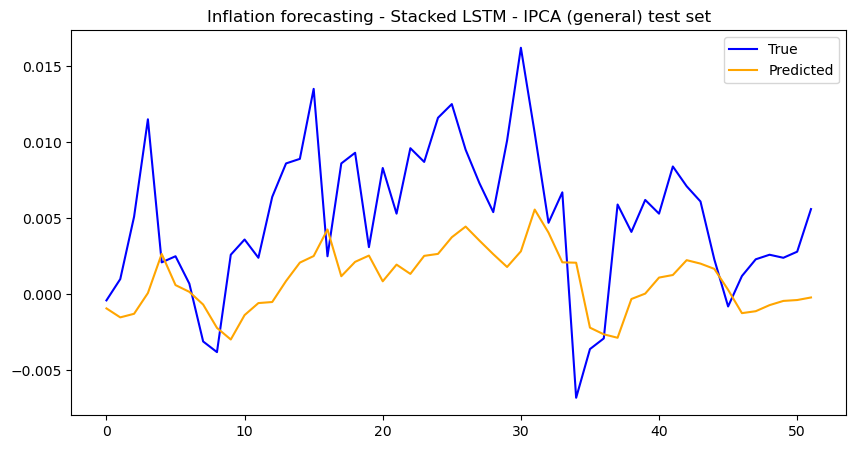

In [37]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Stacked LSTM - IPCA (general) test set')
plt.plot(ytest_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_stk.predict(Xtest_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

17/17 [==============================] - 0s 2ms/step


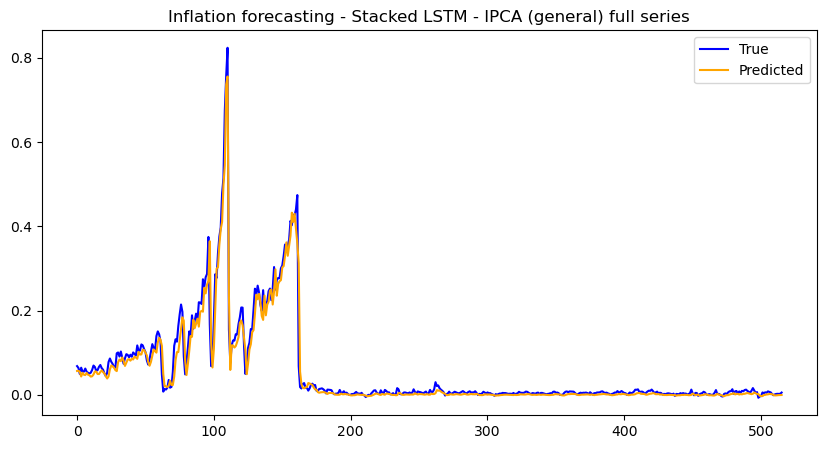

In [38]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - Stacked LSTM - IPCA (general) full series')
plt.plot(y_IPCAgen_std, color='blue', label='True')
plt.plot(lstm_IPCAgen_stk.predict(X_IPCAgen_std), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (food)

In [39]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_IPCAfood_stk = keras.models.Sequential()
lstm_IPCAfood_stk.add(keras.layers.LSTM(50, activation='relu', return_sequences=True,
                                        input_shape=(n_steps_std, n_features_std)))
lstm_IPCAfood_stk.add(keras.layers.LSTM(50, activation='relu'))
lstm_IPCAfood_stk.add(keras.layers.Dense(1))
lstm_IPCAfood_stk.compile(optimizer='adam', loss='mse')
lstm_IPCAfood_stk.fit(Xtrain_IPCAfood_std, ytrain_IPCAfood_std, 
                      validation_data=(Xval_IPCAfood_std, yval_IPCAfood_std),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 2s 30ms/step - loss: 0.0185 - val_loss: 0.0038
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0128 - val_loss: 0.0037
Epoch 3/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0105 - val_loss: 0.0012
Epoch 4/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 4.0857e-05
Epoch 5/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0086 - val_loss: 5.6480e-05
Epoch 6/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0080 - val_loss: 8.5440e-05
Epoch 7/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0077 - val_loss: 3.3879e-04
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 4.6811e-05
Epoch 9/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 6.6022e-04
Epoch 10/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0070 -

12/12 [==============================] - 0s 3ms/step


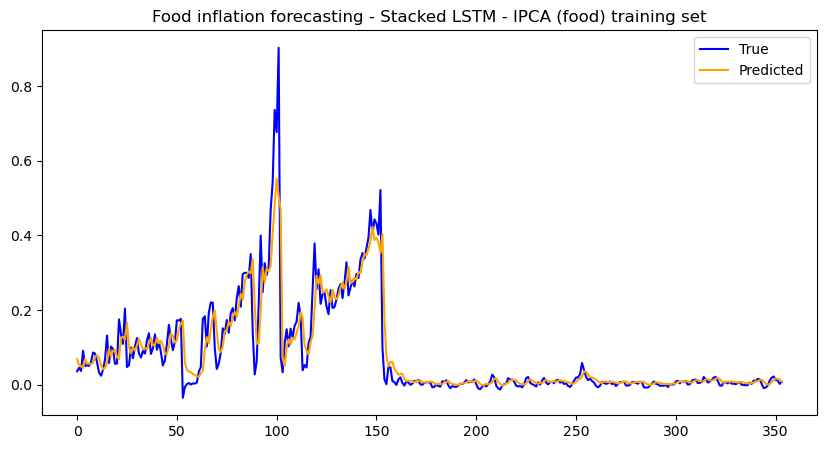

In [40]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Stacked LSTM - IPCA (food) training set')
plt.plot(ytrain_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_stk.predict(Xtrain_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


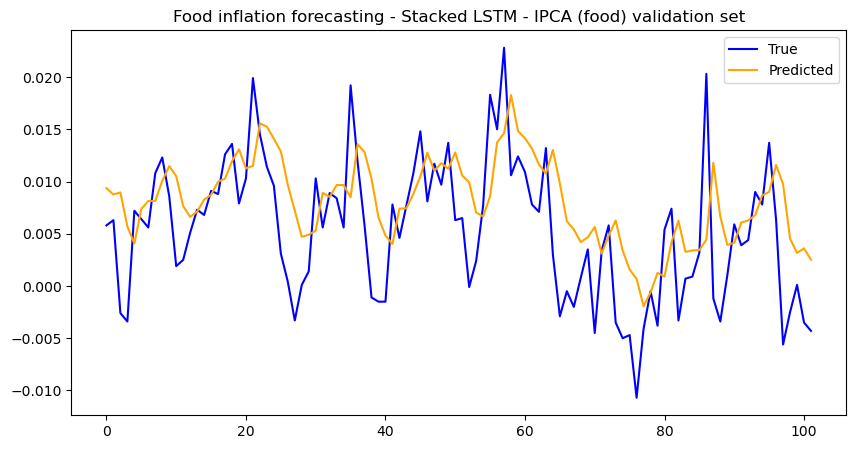

In [41]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Stacked LSTM - IPCA (food) validation set')
plt.plot(yval_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_stk.predict(Xval_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 4ms/step


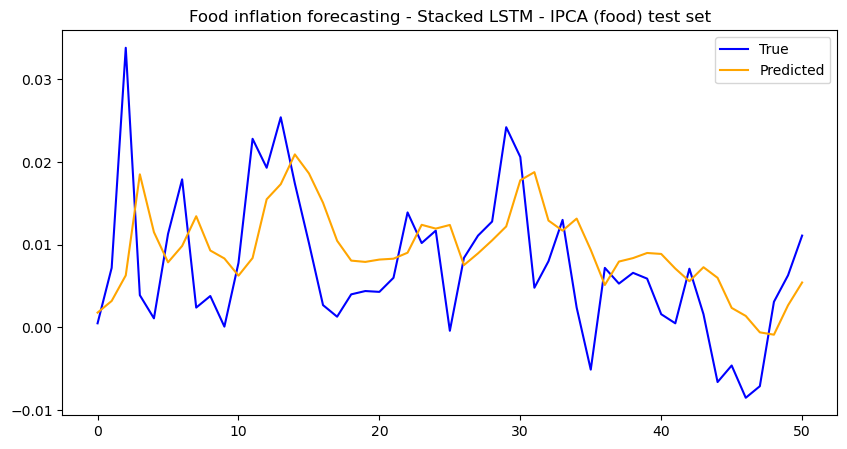

In [42]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Stacked LSTM - IPCA (food) test set')
plt.plot(ytest_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_stk.predict(Xtest_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


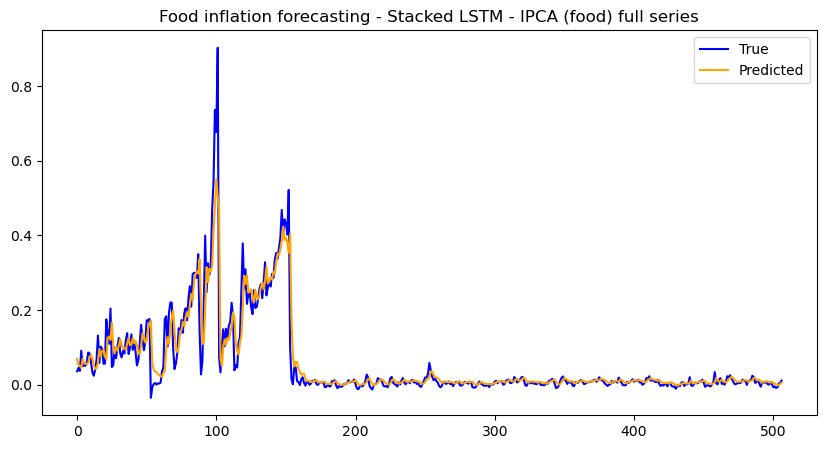

In [43]:
plt.figure(figsize=(10,5))
plt.title('Food inflation forecasting - Stacked LSTM - IPCA (food) full series')
plt.plot(y_IPCAfood_std, color='blue', label='True')
plt.plot(lstm_IPCAfood_stk.predict(X_IPCAfood_std), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (health)

In [44]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_IPCAhlth_stk = keras.models.Sequential()
lstm_IPCAhlth_stk.add(keras.layers.LSTM(50, activation='relu', return_sequences=True,
                                        input_shape=(n_steps_std, n_features_std)))
lstm_IPCAhlth_stk.add(keras.layers.LSTM(50, activation='relu'))
lstm_IPCAhlth_stk.add(keras.layers.Dense(1))
lstm_IPCAhlth_stk.compile(optimizer='adam', loss='mse')
lstm_IPCAhlth_stk.fit(Xtrain_IPCAhlth_std, ytrain_IPCAhlth_std, 
                      validation_data=(Xval_IPCAhlth_std, yval_IPCAhlth_std),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 2s 32ms/step - loss: 0.0176 - val_loss: 0.0041
Epoch 2/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0120 - val_loss: 8.1996e-04
Epoch 3/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0097 - val_loss: 1.2339e-04
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0091 - val_loss: 3.5201e-04
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 3.8935e-04
Epoch 6/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0089 - val_loss: 4.0194e-05
Epoch 7/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0102 - val_loss: 3.3829e-05
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0087 - val_loss: 0.0016
Epoch 9/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 4.8319e-05
Epoch 10/200
12/12 [==============================] - 0s 8ms/step - loss: 0.008

12/12 [==============================] - 0s 3ms/step


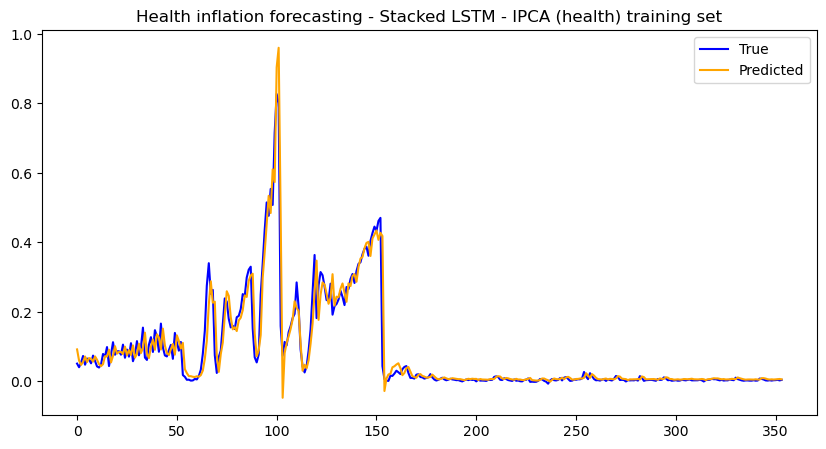

In [45]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Stacked LSTM - IPCA (health) training set')
plt.plot(ytrain_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_stk.predict(Xtrain_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


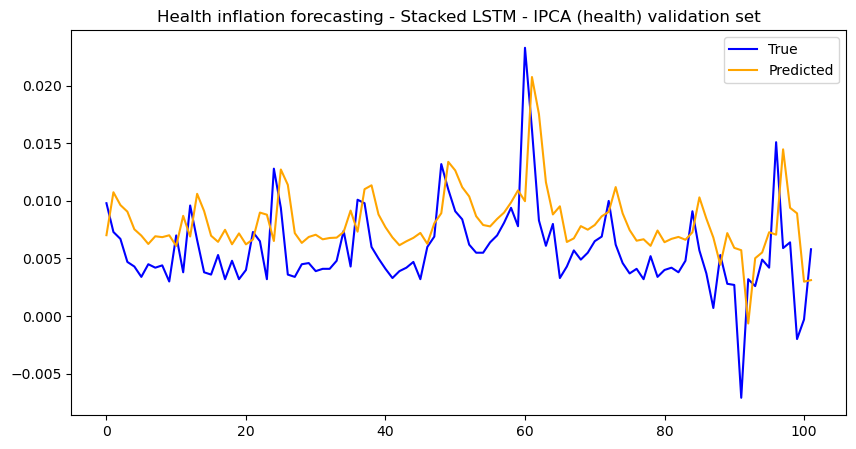

In [46]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Stacked LSTM - IPCA (health) validation set')
plt.plot(yval_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_stk.predict(Xval_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


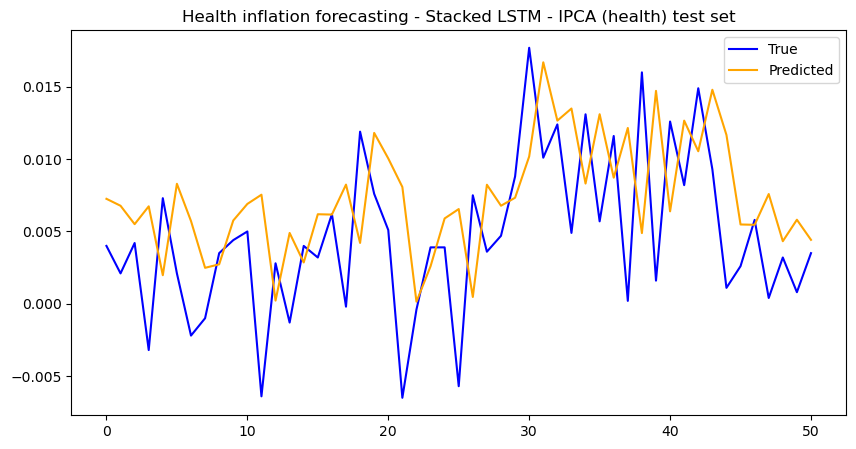

In [47]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Stacked LSTM - IPCA (health) test set')
plt.plot(ytest_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_stk.predict(Xtest_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


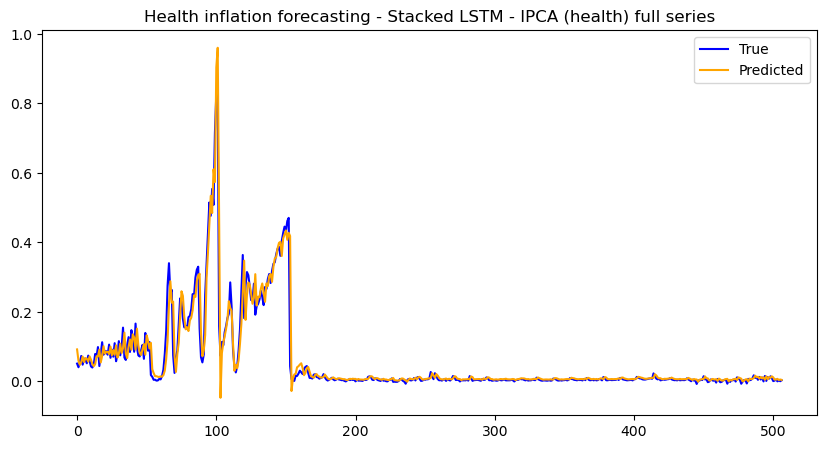

In [48]:
plt.figure(figsize=(10,5))
plt.title('Health inflation forecasting - Stacked LSTM - IPCA (health) full series')
plt.plot(y_IPCAhlth_std, color='blue', label='True')
plt.plot(lstm_IPCAhlth_stk.predict(X_IPCAhlth_std), color='orange', label='Predicted')
plt.legend()
plt.show()

## CNN LSTM  
Despite continuing to use 12 time steps, the CNN requires the data to be reshaped to a set of subsequences for the convolutions. In this case, we are going to attempt reshaping the sequence to three subsequences of four steps.

### IPCA (general)

In [49]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps = 12
n_features = 1
n_seqs_cnn = 3
n_steps_cnn = 4

X_IPCAgen_CNN, y_IPCAgen_CNN = split_Xy(np.array(ipca_general_raw), n_steps)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAgen_CNN = X_IPCAgen_std.reshape((X_IPCAgen_std.shape[0], n_seqs_cnn, n_steps_cnn, n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAgen_CNN = X_IPCAgen_CNN[:int(len(X_IPCAgen_CNN)*0.7)]
ytrain_IPCAgen_CNN = y_IPCAgen_CNN[:int(len(y_IPCAgen_CNN)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAgen_CNN = X_IPCAgen_CNN[int(len(X_IPCAgen_CNN)*0.7):int(len(X_IPCAgen_CNN)*0.9)]
yval_IPCAgen_CNN = y_IPCAgen_CNN[int(len(y_IPCAgen_CNN)*0.7):int(len(y_IPCAgen_CNN)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAgen_CNN = X_IPCAgen_CNN[int(len(X_IPCAgen_CNN)*0.9):]
ytest_IPCAgen_CNN = y_IPCAgen_CNN[int(len(y_IPCAgen_CNN)*0.9):]

In [50]:
lstm_IPCAgen_CNN = keras.models.Sequential()
lstm_IPCAgen_CNN.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'), 
                                                  input_shape=(None, n_steps_cnn, n_features)))
lstm_IPCAgen_CNN.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=2)))
lstm_IPCAgen_CNN.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
lstm_IPCAgen_CNN.add(keras.layers.LSTM(50, activation='relu'))
lstm_IPCAgen_CNN.add(keras.layers.Dense(1))
lstm_IPCAgen_CNN.compile(optimizer='adam', loss='mse')
lstm_IPCAgen_CNN.fit(Xtrain_IPCAgen_CNN, ytrain_IPCAgen_CNN, 
                     validation_data=(Xval_IPCAgen_CNN, yval_IPCAgen_CNN),
                     epochs=200, verbose=1)


Epoch 1/200
12/12 [==============================] - 1s 22ms/step - loss: 0.0138 - val_loss: 0.0019
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 9.7860e-04
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 8.8096e-06
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 4.5690e-05
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 2.7871e-05
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 5.4384e-05
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 8.1203e-06
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 6.2845e-05
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 1.1384e-04
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0

12/12 [==============================] - 0s 2ms/step


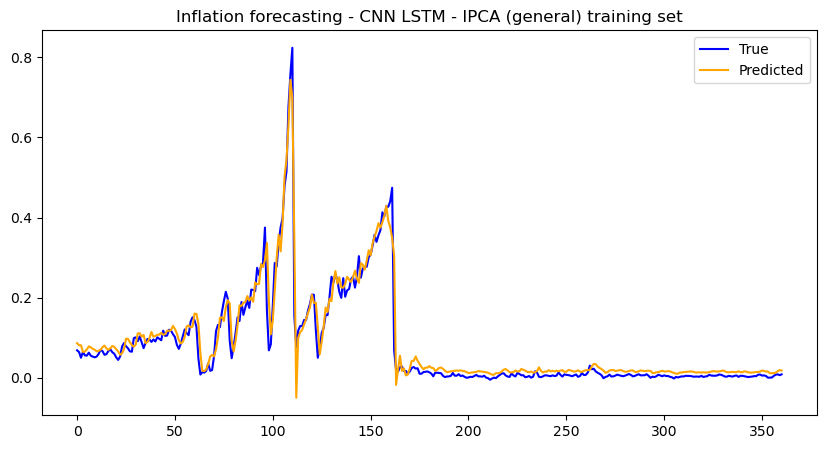

In [51]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (general) training set')
plt.plot(ytrain_IPCAgen_CNN, color='blue', label='True')
plt.plot(lstm_IPCAgen_CNN.predict(Xtrain_IPCAgen_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


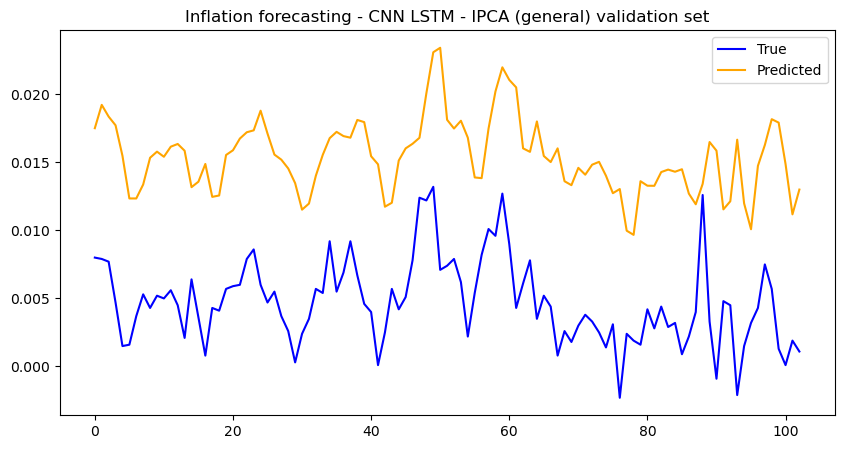

In [52]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (general) validation set')
plt.plot(yval_IPCAgen_CNN, color='blue', label='True')
plt.plot(lstm_IPCAgen_CNN.predict(Xval_IPCAgen_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


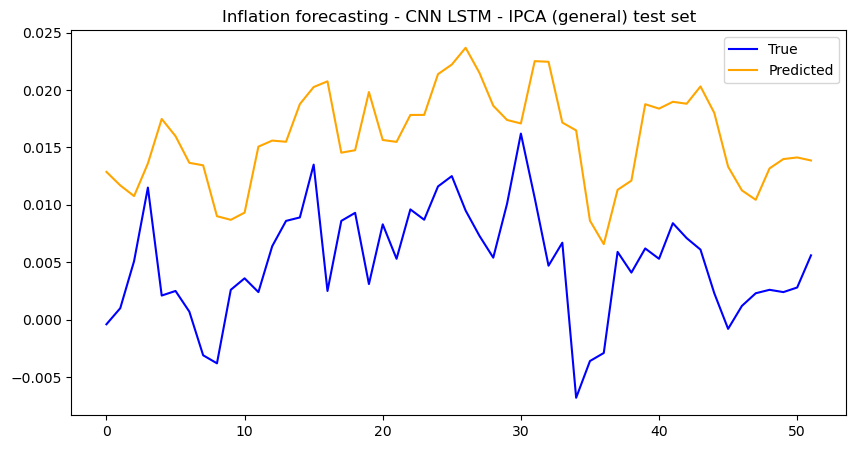

In [53]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (general) test set')
plt.plot(ytest_IPCAgen_CNN, color='blue', label='True')
plt.plot(lstm_IPCAgen_CNN.predict(Xtest_IPCAgen_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

17/17 [==============================] - 0s 2ms/step


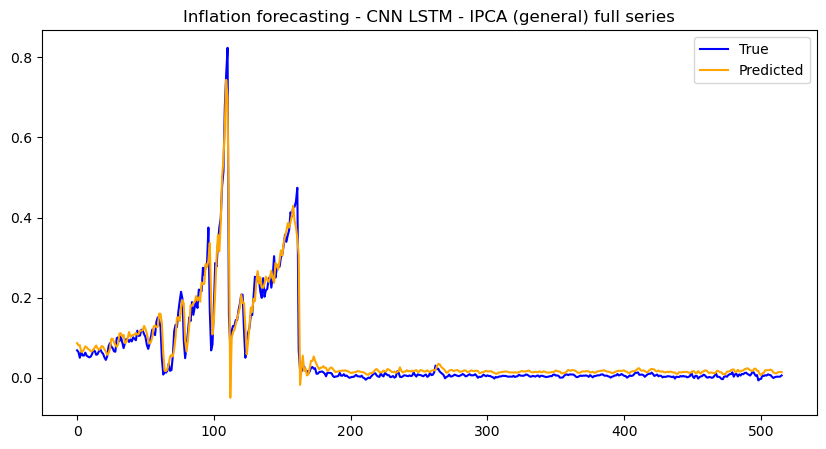

In [54]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (general) full series')
plt.plot(y_IPCAgen_CNN, color='blue', label='True')
plt.plot(lstm_IPCAgen_CNN.predict(X_IPCAgen_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (food)

In [55]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps = 12
n_features = 1
n_seqs_cnn = 3
n_steps_cnn = 4

X_IPCAfood_CNN, y_IPCAfood_CNN = split_Xy(np.array(ipca_food_raw), n_steps)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAfood_CNN = X_IPCAfood_std.reshape((X_IPCAfood_std.shape[0], n_seqs_cnn, n_steps_cnn, n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAfood_CNN = X_IPCAfood_CNN[:int(len(X_IPCAfood_CNN)*0.7)]
ytrain_IPCAfood_CNN = y_IPCAfood_CNN[:int(len(y_IPCAfood_CNN)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAfood_CNN = X_IPCAfood_CNN[int(len(X_IPCAfood_CNN)*0.7):int(len(X_IPCAfood_CNN)*0.9)]
yval_IPCAfood_CNN = y_IPCAfood_CNN[int(len(y_IPCAfood_CNN)*0.7):int(len(y_IPCAfood_CNN)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAfood_CNN = X_IPCAfood_CNN[int(len(X_IPCAfood_CNN)*0.9):]
ytest_IPCAfood_CNN = y_IPCAfood_CNN[int(len(y_IPCAfood_CNN)*0.9):]

In [56]:
lstm_IPCAfood_CNN = keras.models.Sequential()
lstm_IPCAfood_CNN.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'), 
                                                   input_shape=(None, n_steps_cnn, n_features)))
lstm_IPCAfood_CNN.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=2)))
lstm_IPCAfood_CNN.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
lstm_IPCAfood_CNN.add(keras.layers.LSTM(50, activation='relu'))
lstm_IPCAfood_CNN.add(keras.layers.Dense(1))
lstm_IPCAfood_CNN.compile(optimizer='adam', loss='mse')
lstm_IPCAfood_CNN.fit(Xtrain_IPCAfood_CNN, ytrain_IPCAfood_CNN, 
                      validation_data=(Xval_IPCAfood_CNN, yval_IPCAfood_CNN),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 22ms/step - loss: 0.0144 - val_loss: 0.0023
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 2.3107e-04
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 7.7521e-05
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 3.7507e-05
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 3.9019e-05
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 1.0549e-04
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 4.5045e-05
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 2.0843e-04
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 4.7643e-05
Epoch 10/200
12/12 [==============================] - 0s 5ms/step - loss: 0.

12/12 [==============================] - 0s 2ms/step


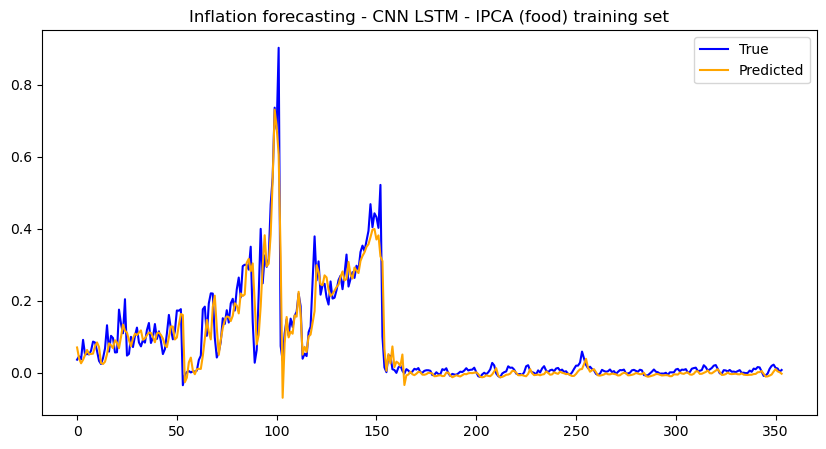

In [57]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (food) training set')
plt.plot(ytrain_IPCAfood_CNN, color='blue', label='True')
plt.plot(lstm_IPCAfood_CNN.predict(Xtrain_IPCAfood_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


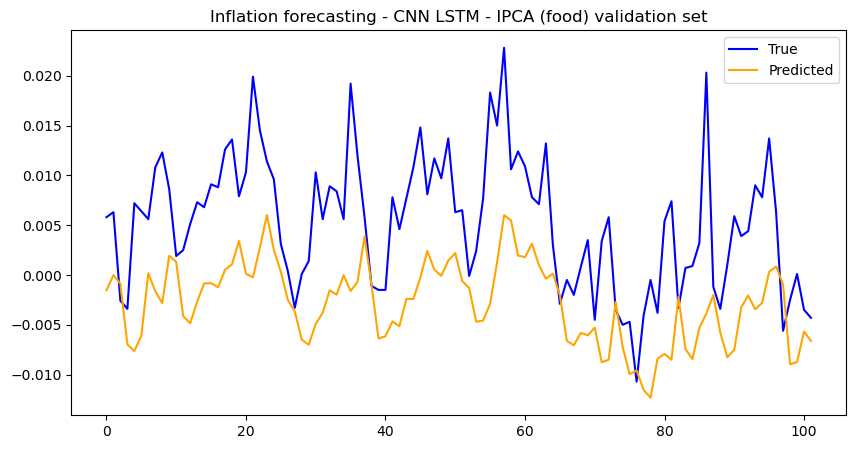

In [58]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (food) validation set')
plt.plot(yval_IPCAfood_CNN, color='blue', label='True')
plt.plot(lstm_IPCAfood_CNN.predict(Xval_IPCAfood_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 4ms/step


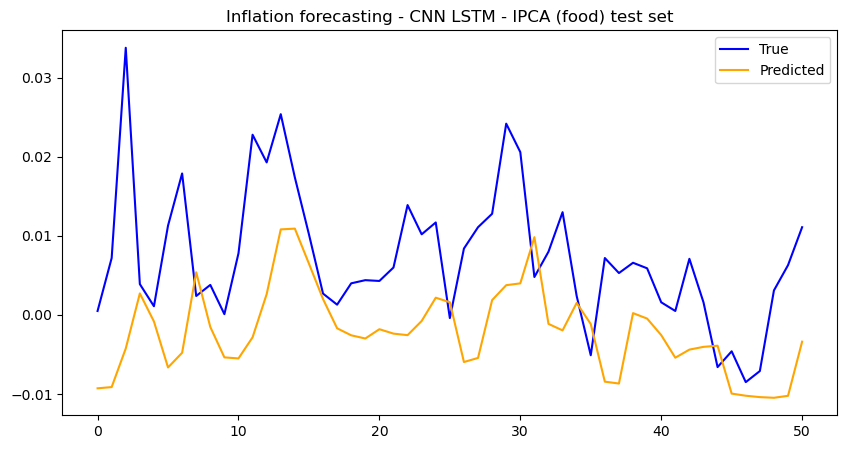

In [59]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (food) test set')
plt.plot(ytest_IPCAfood_CNN, color='blue', label='True')
plt.plot(lstm_IPCAfood_CNN.predict(Xtest_IPCAfood_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


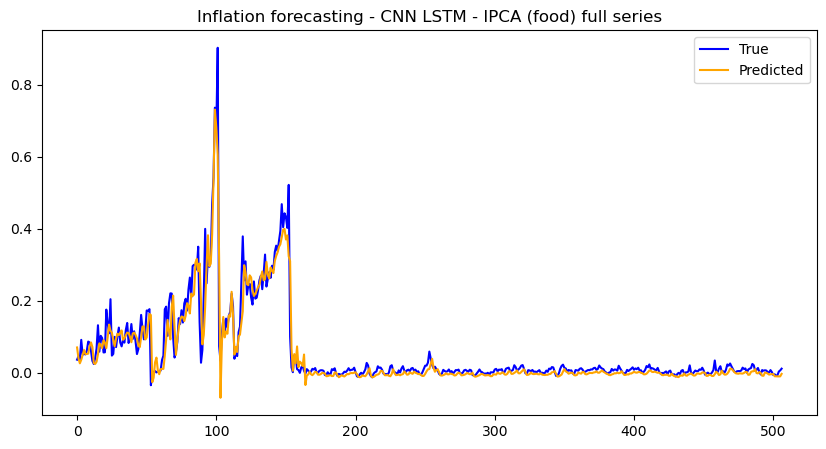

In [60]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (food) full series')
plt.plot(y_IPCAfood_CNN, color='blue', label='True')
plt.plot(lstm_IPCAfood_CNN.predict(X_IPCAfood_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

### IPCA (health)

In [61]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps = 12
n_features = 1
n_seqs_cnn = 3
n_steps_cnn = 4

X_IPCAhlth_CNN, y_IPCAhlth_CNN = split_Xy(np.array(ipca_health_raw), n_steps)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAhlth_CNN = X_IPCAhlth_std.reshape((X_IPCAhlth_std.shape[0], n_seqs_cnn, n_steps_cnn, n_features_std))

# Separating values in training, validation and testing
# 70% of the series will be used for testing
Xtrain_IPCAhlth_CNN = X_IPCAhlth_CNN[:int(len(X_IPCAhlth_CNN)*0.7)]
ytrain_IPCAhlth_CNN = y_IPCAhlth_CNN[:int(len(y_IPCAhlth_CNN)*0.7)]
# 20% of the series will be used for validation
Xval_IPCAhlth_CNN = X_IPCAhlth_CNN[int(len(X_IPCAhlth_CNN)*0.7):int(len(X_IPCAhlth_CNN)*0.9)]
yval_IPCAhlth_CNN = y_IPCAhlth_CNN[int(len(y_IPCAhlth_CNN)*0.7):int(len(y_IPCAhlth_CNN)*0.9)]
# 10% of the series will be used for testing
Xtest_IPCAhlth_CNN = X_IPCAhlth_CNN[int(len(X_IPCAhlth_CNN)*0.9):]
ytest_IPCAhlth_CNN = y_IPCAhlth_CNN[int(len(y_IPCAhlth_CNN)*0.9):]

In [62]:
lstm_IPCAhlth_CNN = keras.models.Sequential()
lstm_IPCAhlth_CNN.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'), 
                                                   input_shape=(None, n_steps_cnn, n_features)))
lstm_IPCAhlth_CNN.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=2)))
lstm_IPCAhlth_CNN.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
lstm_IPCAhlth_CNN.add(keras.layers.LSTM(50, activation='relu'))
lstm_IPCAhlth_CNN.add(keras.layers.Dense(1))
lstm_IPCAhlth_CNN.compile(optimizer='adam', loss='mse')
lstm_IPCAhlth_CNN.fit(Xtrain_IPCAhlth_CNN, ytrain_IPCAhlth_CNN, 
                      validation_data=(Xval_IPCAhlth_CNN, yval_IPCAhlth_CNN),
                      epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 22ms/step - loss: 0.0218 - val_loss: 6.7905e-04
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0032
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.0014
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 2.8408e-05
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 4.3309e-05
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 1.5527e-05
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 3.1412e-05
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 1.5132e-05
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 4.9219e-05
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0063

12/12 [==============================] - 0s 2ms/step


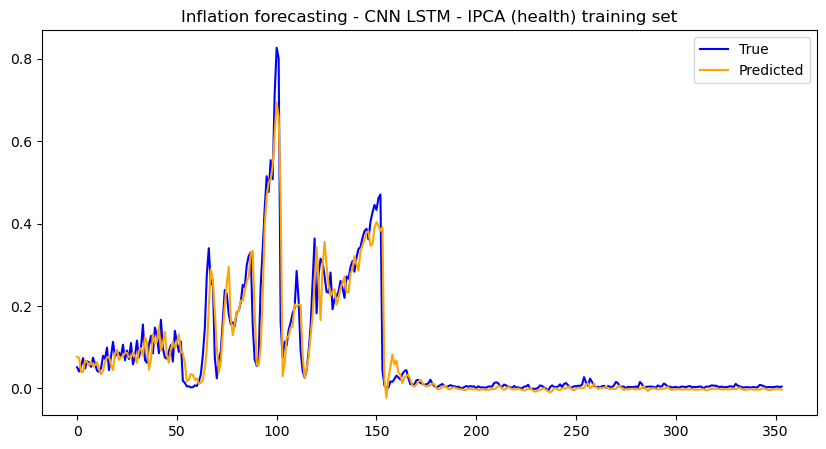

In [63]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (health) training set')
plt.plot(ytrain_IPCAhlth_CNN, color='blue', label='True')
plt.plot(lstm_IPCAhlth_CNN.predict(Xtrain_IPCAhlth_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


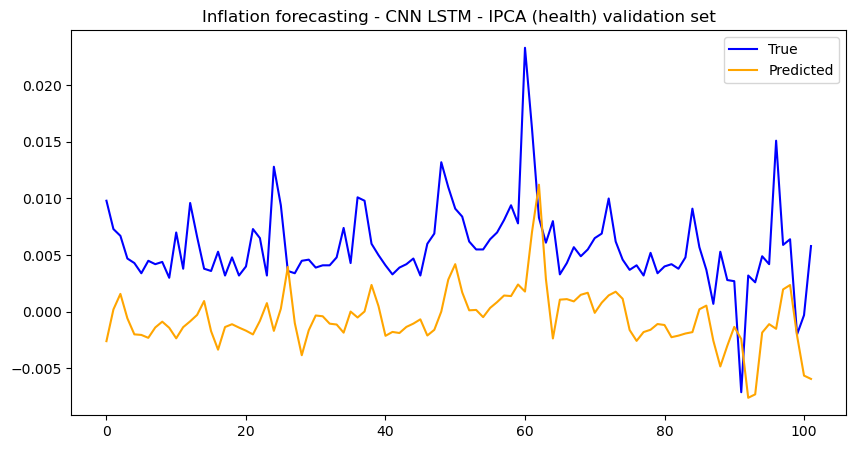

In [64]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (health) validation set')
plt.plot(yval_IPCAhlth_CNN, color='blue', label='True')
plt.plot(lstm_IPCAhlth_CNN.predict(Xval_IPCAhlth_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


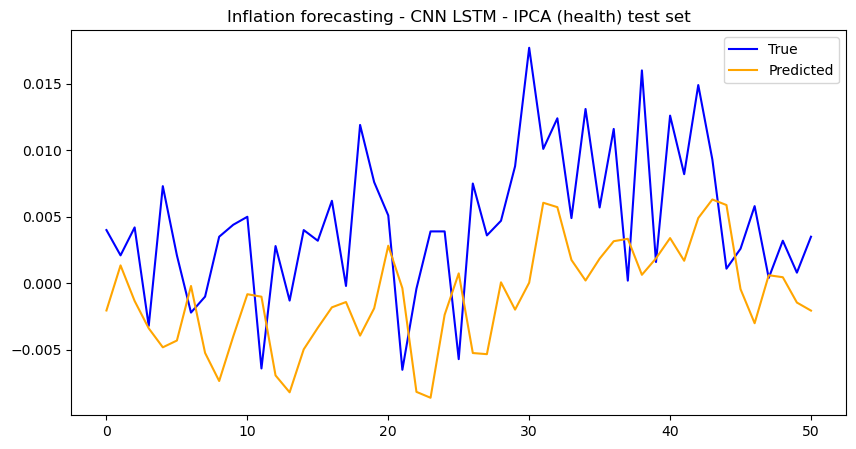

In [65]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (health) test set')
plt.plot(ytest_IPCAhlth_CNN, color='blue', label='True')
plt.plot(lstm_IPCAhlth_CNN.predict(Xtest_IPCAhlth_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


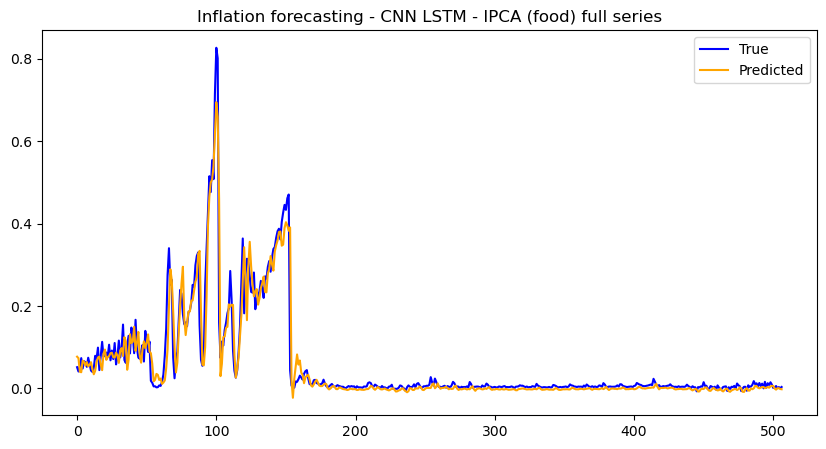

In [66]:
plt.figure(figsize=(10,5))
plt.title('Inflation forecasting - CNN LSTM - IPCA (food) full series')
plt.plot(y_IPCAhlth_CNN, color='blue', label='True')
plt.plot(lstm_IPCAhlth_CNN.predict(X_IPCAhlth_CNN), color='orange', label='Predicted')
plt.legend()
plt.show()